# Imports

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

# Load Data

**Preparación del Conjunto de Datos MNIST**

En este ejemplo, utilizaremos el conjunto de datos MNIST, que es un conjunto de imágenes de dígitos manuscritos de 28x28 píxeles. Este conjunto de datos es ampliamente utilizado para simplificar la clasificación de imágenes en problemas de aprendizaje automático y aprendizaje profundo.

**Normalización de Imágenes**

Primero, dividimos el conjunto de datos en conjuntos de entrenamiento (`trainX`, `trainY`) y de prueba (`testX`, `testY`). A continuación, normalizamos los valores de los píxeles dividiendo cada imagen por 255.0, lo que garantiza que los valores de los píxeles se encuentren en el rango de 0 a 1. Esta normalización es esencial para mejorar la convergencia durante el entrenamiento de la red neuronal.

**Codificación de Etiquetas**

Utilizamos `LabelBinarizer` de la biblioteca `sklearn` para transformar las etiquetas de clase en un formato binario (one-hot encoding). Este proceso es crucial porque nuestras redes neuronales suelen requerir que las etiquetas sean presentadas en este formato, facilitando la clasificación en múltiples clases. Por ejemplo, la etiqueta para el dígito "2" se representará como `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`, donde cada posición en el vector representa la probabilidad de cada clase.



In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()
# (trainX, trainY), (testX, testY) = fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

train_labels = trainY
test_labels = testY

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Train X dataset shape: ", np.shape(trainX))
print("Train y dataset shape: ", np.shape(trainY))
print("Test X dataset shape: ", np.shape(testX))
print("Test y dataset shape: ", np.shape(testY))

Train X dataset shape:  (60000, 28, 28)
Train y dataset shape:  (60000, 10)
Test X dataset shape:  (10000, 28, 28)
Test y dataset shape:  (10000, 10)


# Función para visualizar

**Función para visualizar ejemplos de predicciones**

La función `show_examples` se utiliza para mostrar ejemplos de imágenes junto con sus etiquetas reales y las predicciones realizadas por un modelo.

**Parámetros:**
- `X`: Conjunto de imágenes a visualizar.
- `y_real`: Etiquetas reales de las imágenes.
- `y_pred`: Etiquetas predichas por el modelo.

**Descripción:**
La función crea un gráfico con 5 subgráficas, donde cada subgráfica muestra una imagen, su etiqueta real y la etiqueta predicha. Esto permite comparar visualmente el rendimiento del modelo en un subconjunto de datos.


In [ ]:
def show_examples(X, y_real, y_pred):
    fig, ax = plt.subplots(1, 5, figsize=[25, 5])

    for i, img in enumerate(X[:5]):
        ax[i].imshow(img, cmap='Greys')
        ax[i].set_title('y real: ' + str(y_real[i]) +
                        '\ny predicted: ' + str(y_pred[i]))
    plt.show()

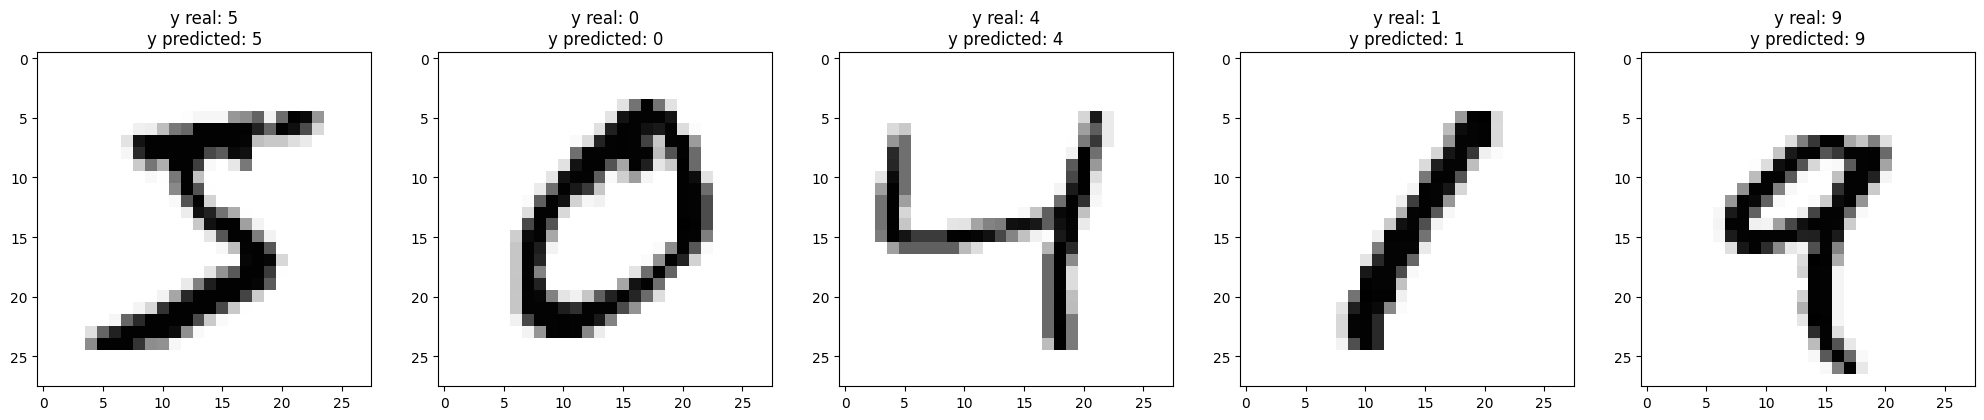

In [ ]:
show_examples(trainX, train_labels, train_labels)

# DNN

**Definición de la Red Neuronal Profunda para Clasificación**

La función `create_classifier_dnn` define una red neuronal profunda (DNN) destinada a la clasificación de imágenes de 28x28 píxeles, como las del conjunto de datos MNIST. A continuación, se describen sus componentes clave:

**Arquitectura:**
- **Capa de Entrada**: La red recibe imágenes en forma de tensores de 28x28 píxeles con un solo canal (escala de grises).
  
- **Capa Flatten**: Esta capa transforma el tensor de entrada 2D (28x28) en un vector unidimensional, permitiendo que la red neuronal procese la información.

- **Capas Densas (Dense)**:
  - **Primera Capa Densa**: 128 neuronas con la función de activación ReLU. ReLU (Rectified Linear Unit) se utiliza comúnmente porque ayuda a mitigar el problema del desvanecimiento del gradiente y permite que la red aprenda características complejas.
  - **Segunda Capa Densa**: 64 neuronas con ReLU. Similar a la primera capa, ayuda a capturar relaciones no lineales en los datos.
  - **Tercera Capa Densa**: 32 neuronas con ReLU. Esta capa continúa la extracción de características importantes.

- **Capa de Salida**: 10 neuronas con la función de activación Softmax. Softmax se utiliza para convertir los logits (valores de salida de la red) en probabilidades que suman 1, permitiendo una interpretación clara de las predicciones en un problema de clasificación multi-clase (como los 10 dígitos en MNIST).


In [ ]:
def create_classifier_dnn():
    input = Input(shape=(28, 28, 1))

    x = Flatten()(input)

    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    output = Dense(10, activation='softmax')(x)

    return Model(input, output)


In [ ]:
model_dnn = create_classifier_dnn()
model_dnn.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

**Cálculo de Parámetros en una Red Neuronal Profunda**

En una red neuronal profunda, el número de parámetros se calcula principalmente para las capas densas (fully connected layers). Cada parámetro representa un peso o un sesgo en la red.

**Fórmula para Calcular los Parámetros en una Capa Densa**

La fórmula general para calcular el número de parámetros en una capa densa es:

Número de parámetros = (n_in + 1) * n_out

Donde:
- \( n_in \) es el número de neuronas en la capa de entrada.
- \( n_out \) es el número de neuronas en la capa de salida.
- \( +1 \) es para incluir el término de sesgo (bias) por cada neurona de salida.

In [ ]:
model_dnn.compile(loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
history_dnn = model_dnn.fit(trainX, trainY, epochs=2, batch_size=128, validation_split=0.2, verbose=1)
# history = model_dnn.fit(trainX, trainY, epochs=2, batch_size=128, validation_data=(testX, testY), verbose=1)

Epoch 1/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - AUC: 0.9684 - FalseNegatives: 5260.2314 - FalsePositives: 1326.4122 - Precision: 0.9199 - Recall: 0.6896 - TrueNegatives: 215822.5312 - TruePositives: 18867.4277 - accuracy: 0.8063 - loss: 0.6529 - val_AUC: 0.9962 - val_FalseNegatives: 830.0000 - val_FalsePositives: 559.0000 - val_Precision: 0.9523 - val_Recall: 0.9308 - val_TrueNegatives: 107441.0000 - val_TruePositives: 11170.0000 - val_accuracy: 0.9406 - val_loss: 0.1972
Epoch 2/2
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - AUC: 0.9971 - FalseNegatives: 1361.0665 - FalsePositives: 908.3165 - Precision: 0.9608 - Recall: 0.9420 - TrueNegatives: 216240.6250 - TruePositives: 22766.5938 - accuracy: 0.9503 - loss: 0.1661 - val_AUC: 0.9980 - val_FalseNegatives: 521.0000 - val_FalsePositives: 380.0000 - val_Precision: 0.9680 - val_Recall: 0.9566 - val_TrueNegatives: 107620.0000 - val_TruePositives: 11479.0000 - val_accuracy: 0.9618 - val_loss: 0.1275


In [ ]:
model_dnn.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history_dnn = model_dnn.fit(trainX, trainY, epochs=15, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9677 - loss: 0.1101 - val_accuracy: 0.9678 - val_loss: 0.1078
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9746 - loss: 0.0802 - val_accuracy: 0.9708 - val_loss: 0.0952
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9814 - loss: 0.0599 - val_accuracy: 0.9700 - val_loss: 0.0993
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9844 - loss: 0.0499 - val_accuracy: 0.9733 - val_loss: 0.0937
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9885 - loss: 0.0390 - val_accuracy: 0.9713 - val_loss: 0.1044
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0289 - val_accuracy: 0.9747 - val_loss: 0.0931
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9921 - loss: 0.0231 - val_accuracy: 0.9763 - val_loss: 0.0922
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.

# Evaluate the model DNN

In [ ]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

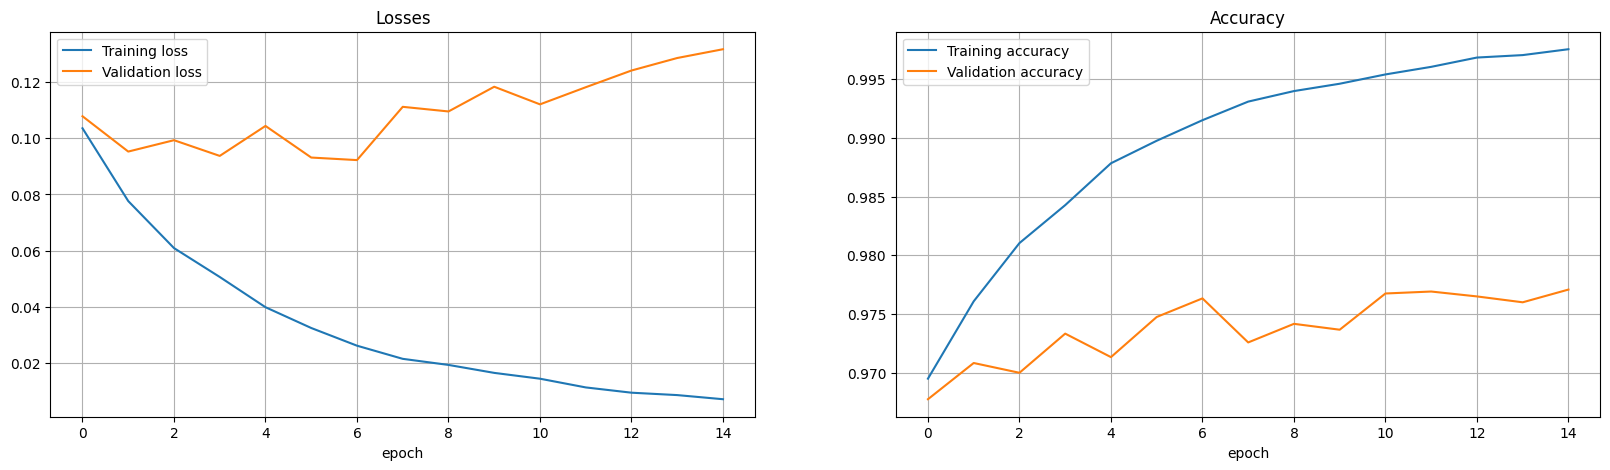

In [ ]:
plot_losses(history_dnn.history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


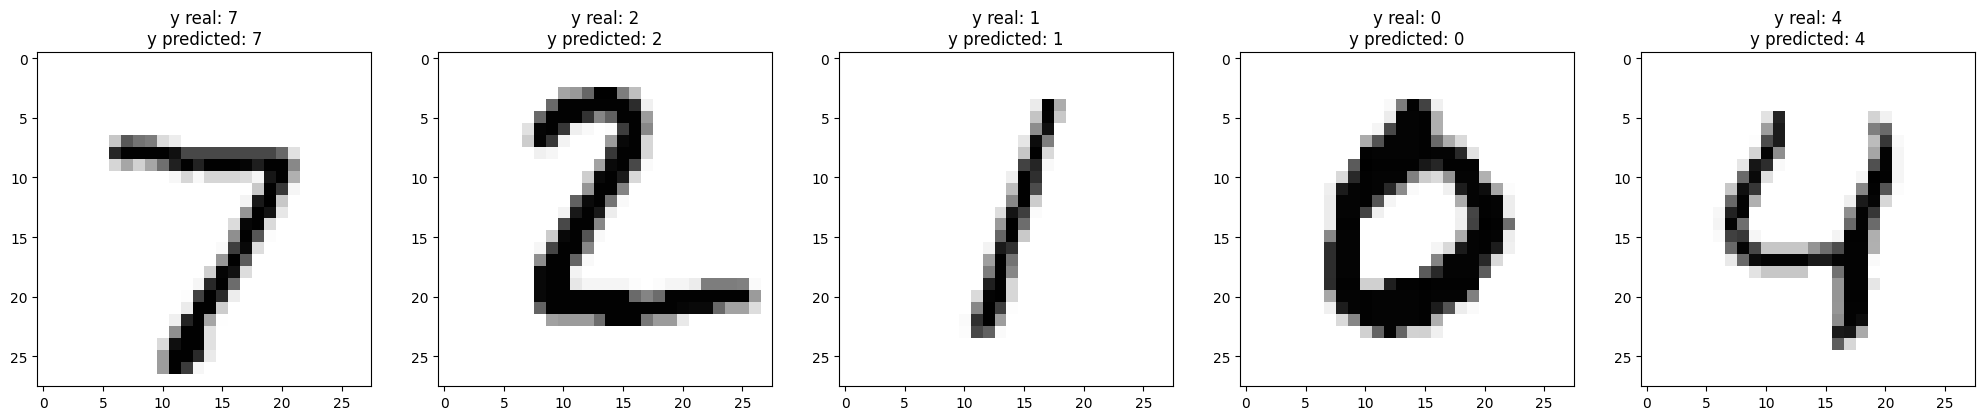

In [ ]:
y_pred = model_dnn.predict(testX[:5]).argmax(axis=-1)

show_examples(testX[:5], test_labels[:5], y_pred)

# Kernels

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar un kernel a una imagen
def apply_kernel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Cargar la imagen
# image_path = 'kawi.png'
image_path = 'michi.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB

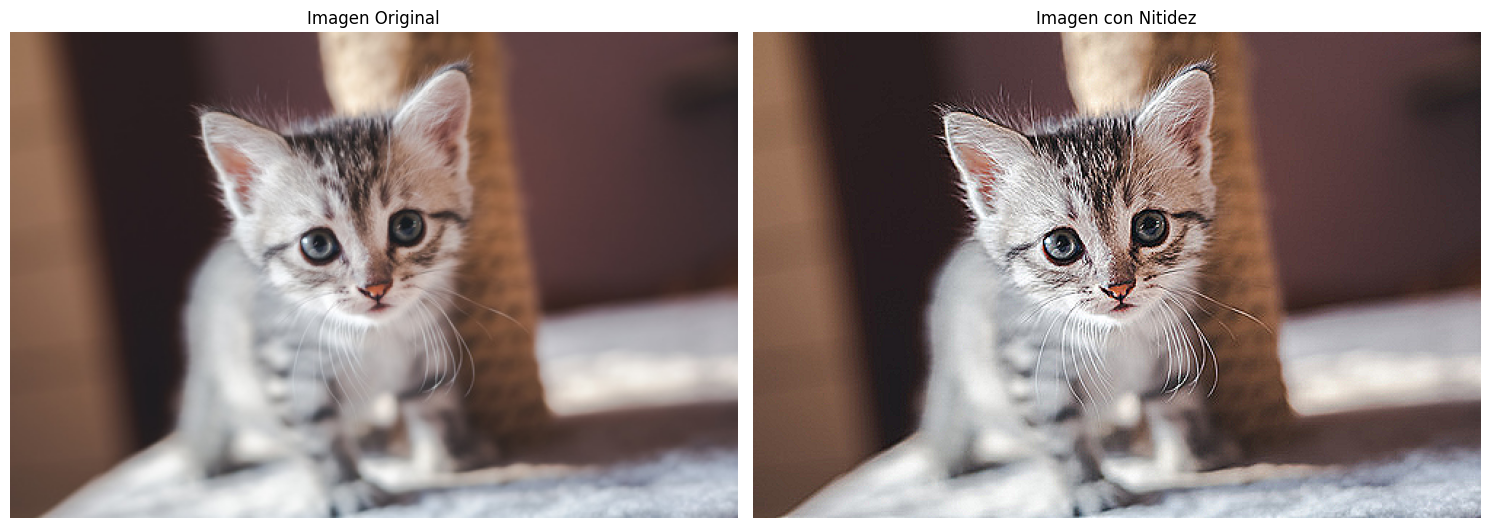

In [ ]:
# Kernel para nitidez
kernel_sharp = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

image_sharp = apply_kernel(image, kernel_sharp)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen con Nitidez')
plt.imshow(image_sharp)
plt.axis('off')

plt.tight_layout()
plt.show()

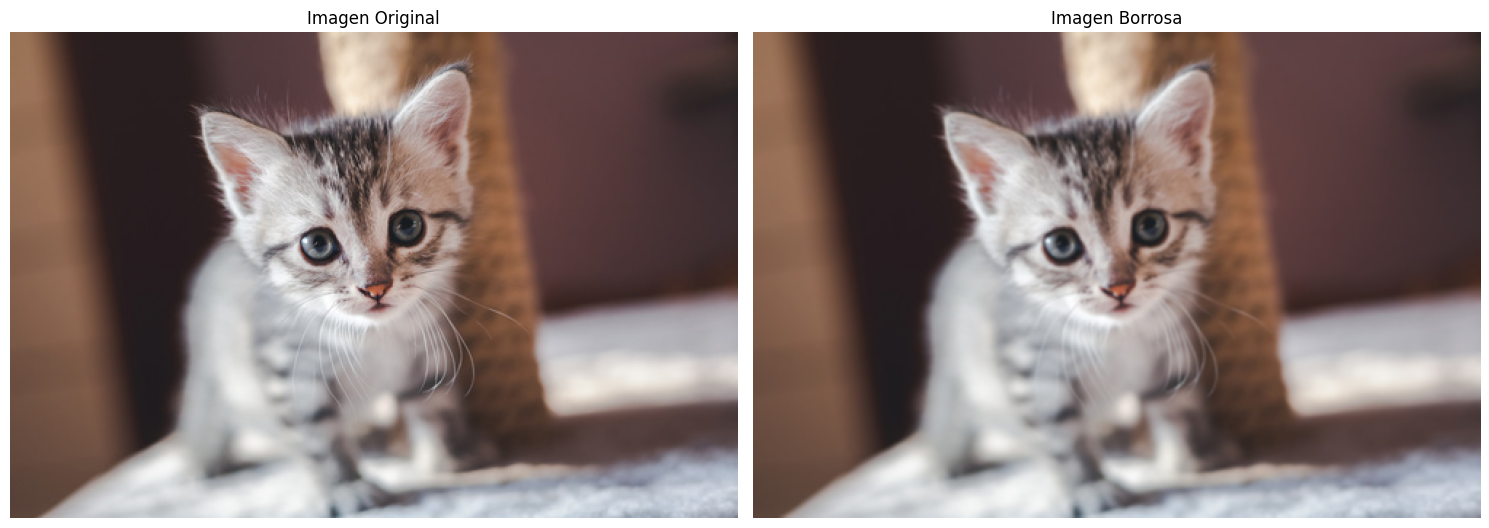

In [ ]:

# Kernel para desenfoque
kernel_blur = np.array([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]]) / 16.0

image_blur = apply_kernel(image, kernel_blur)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Borrosa')
plt.imshow(image_blur)
plt.axis('off')

plt.tight_layout()
plt.show()

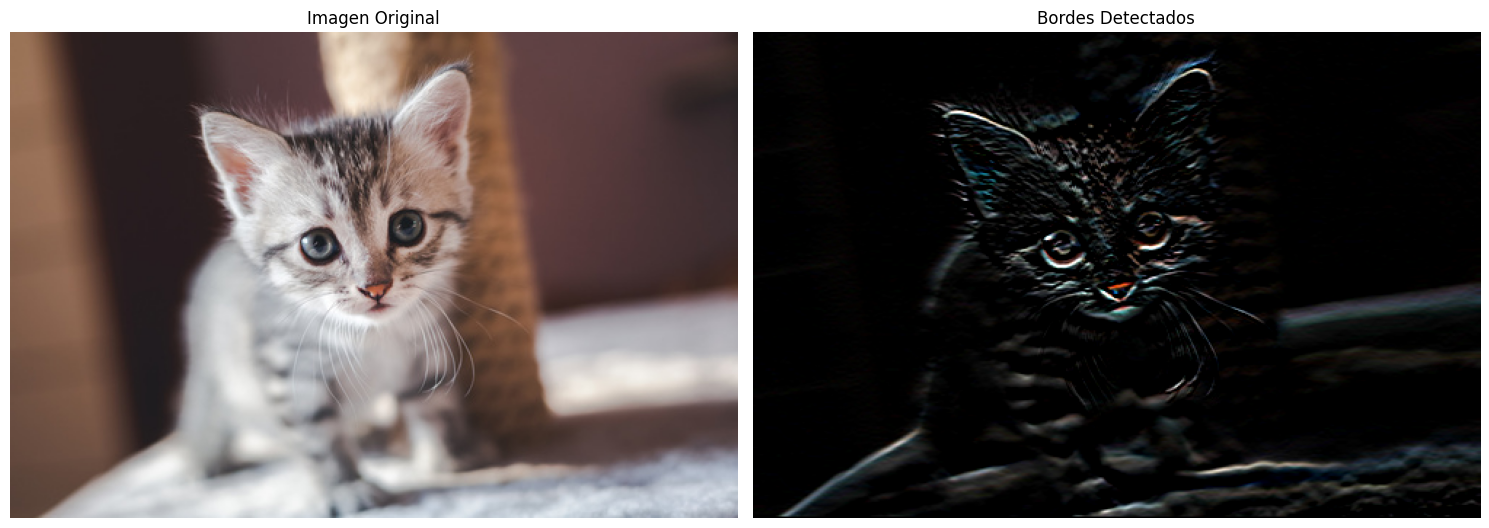

In [ ]:
# Kernel para detección de bordes (Sobel)
kernel_edges = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])

image_edges = apply_kernel(image, kernel_edges)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Bordes Detectados')
plt.imshow(image_edges)
plt.axis('off')

plt.tight_layout()
plt.show()

#CNN

Utiliza capas convolucionales y de pooling para capturar patrones y características locales de las imágenes, lo cual suele mejorar el rendimiento en datos visuales.


In [ ]:
def create_classifier_cnn():
    input = Input(shape=(28, 28, 1))

    x = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(input)
    x = MaxPooling2D()(x)
    x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = MaxPooling2D()(x)

    x = Flatten()(x)

    output = Dense(10, activation='softmax')(x)

    return Model(input, output)

In [ ]:
model_cnn = create_classifier_cnn()
model_cnn.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │          15,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

**Cálculo de Parámetros en una Capa Conv2D**

Para calcular el número de parámetros en una capa de convolución (Conv2D) de una red neuronal convolucional (CNN), puedes seguir un proceso específico que depende de varios factores, como el tamaño del filtro, el número de canales de entrada y el número de filtros en la capa.

**Fórmula para Calcular los Parámetros en Conv2D**

La fórmula general para calcular el número de parámetros de una capa Conv2D es:

Número de parámetros = (k_h * k_w * d_in + 1) * d_out

Donde:
- \( k_h \) es la altura del filtro (kernel).
- \( k_w \) es la anchura del filtro (kernel).
- \( d_in \) es el número de canales de entrada.
- \( d_out \) es el número de filtros (o kernels) en la capa Conv2D.
- \( +1 \) es para incluir el término de sesgo (bias) por cada filtro.

In [ ]:
model_cnn.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(trainX, trainY, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.7966 - loss: 0.7337 - val_accuracy: 0.9663 - val_loss: 0.1181
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.9673 - loss: 0.1093 - val_accuracy: 0.9786 - val_loss: 0.0775
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.9766 - loss: 0.0745 - val_accuracy: 0.9781 - val_loss: 0.0699
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9807 - loss: 0.0598 - val_accuracy: 0.9807 - val_loss: 0.0615
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9843 - loss: 0.0496 - val_accuracy: 0.9823 - val_loss: 0.0598


#Evaluate the model CNN

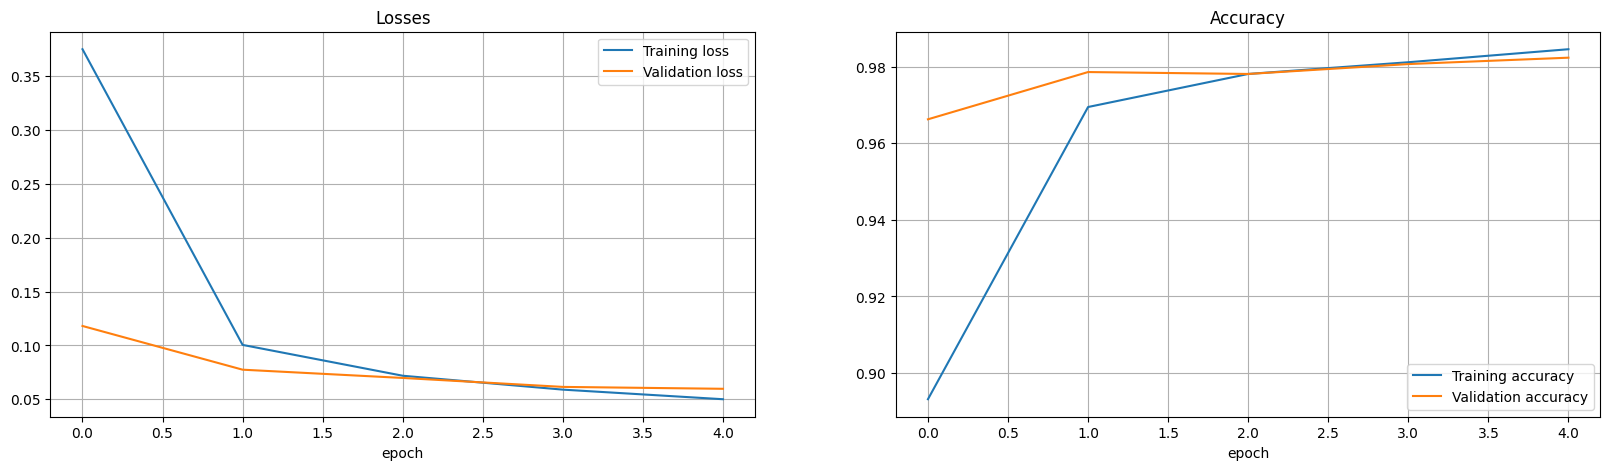

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


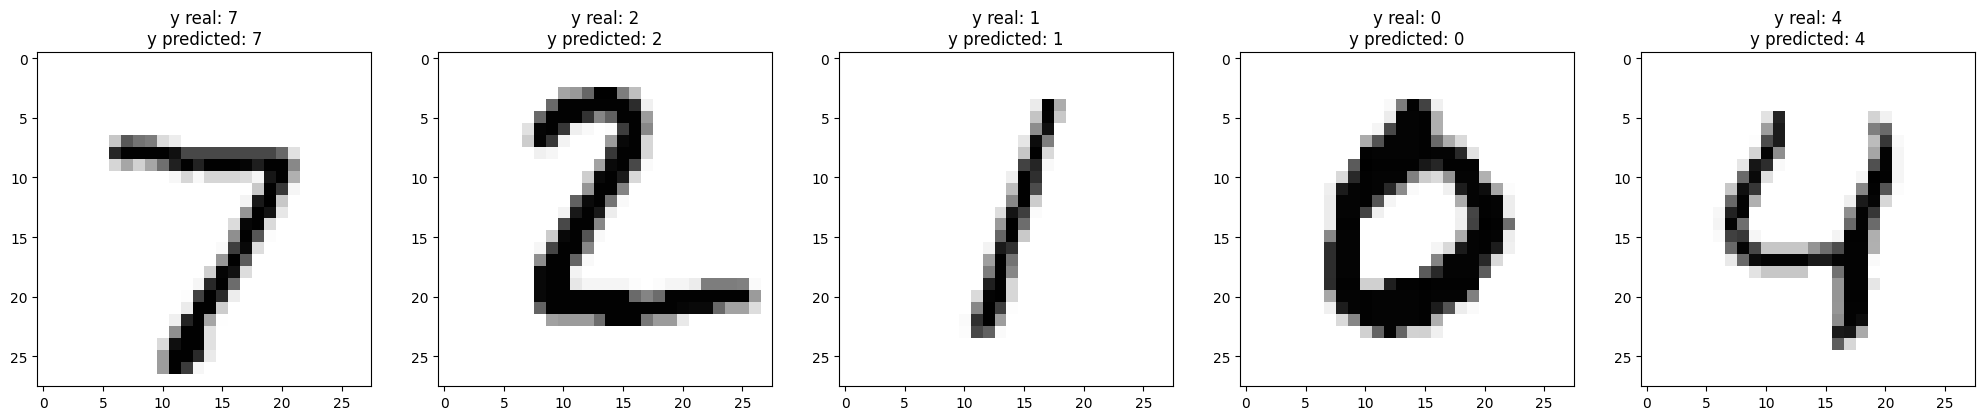

In [ ]:
plot_losses(history_cnn.history)

y_pred = model_cnn.predict(testX[:5]).argmax(axis=-1)
show_examples(testX[:5], test_labels[:5], y_pred)

#Red Neuronal Convolucional Preentrenada

**Red Neuronal Preentrenada**

Una **Red Neuronal Preentrenada** es un modelo que ya ha sido entrenado en un conjunto de datos grande y general. Este enfoque permite:

- **Transferir el Aprendizaje**: Aprovechar las características y patrones aprendidos en un conjunto de datos extenso.
  
- **Adaptación a Nuevas Tareas**: Ajustar la red para realizar tareas similares utilizando menos datos.

- **Ahorro de Tiempo**: Reducir significativamente el tiempo de entrenamiento al iniciar desde un modelo que ya posee conocimiento previo.

El **fine-tuning** es un enfoque en el aprendizaje profundo que consiste en adaptar un modelo preentrenado a una tarea específica. Este proceso implica congelar las capas del modelo preentrenado que detectan características básicas, como bordes y texturas, y agregar nuevas capas para realizar la clasificación deseada.

En el fine-tuning, se congelan generalmente las capas más cercanas a la entrada del modelo, lo que permite preservar los conocimientos adquiridos en la tarea original. A continuación, se añaden nuevas capas densas entrenables que se ajustan para clasificar las nuevas categorías específicas. De esta manera, el modelo puede beneficiarse de las características generales que ya ha aprendido, mientras se adapta a la nueva tarea.

**Ventajas del Fine-Tuning:**

- **Eficiencia**: Se ahorra tiempo y recursos, ya que el modelo preentrenado ya ha aprendido características útiles.
- **Menor sobreajuste**: Dado que se comienza con un modelo que ha aprendido de un gran conjunto de datos, hay menos probabilidad de sobreajuste en un conjunto de datos pequeño.
- **Mejor rendimiento**: A menudo, el fine-tuning da como resultado un mejor rendimiento que entrenar un modelo desde cero, especialmente en tareas con datos limitados.


| **Cantidad de Datos** | **Tipo de Ajuste**                         | **Acciones Sugeridas**                           |
|-----------------------|--------------------------------------------|--------------------------------------------------|
| **Pocos datos**       | Fine-tuning de la capa de salida          | Prueba a obtener más datos o hacer augmentation   |
| **Muchos datos**      | Fine-tuning de algunas capas               | Fine-tuning de muchas capas                       |


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 1. Cargar el modelo VGG16 preentrenado, sin las capas de clasificación finales (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas convolucionales de VGG16 para conservar el conocimiento preentrenado
for layer in base_model.layers:
    layer.trainable = False

# 2. Construir el modelo personalizado
def create_custom_vgg():
    # Entrada de tamaño (224, 224, 3) para cumplir con la estructura de VGG16
    input_layer = Input(shape=(224, 224, 3))

    # Pasar la entrada a través de las capas preentrenadas de VGG16
    x = base_model(input_layer, training=False)

    # Aplanar la salida de las capas convolucionales
    x = Flatten()(x)

    # Añadir capas densas para adaptar el modelo a la clasificación en 10 clases
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    output_layer = Dense(10, activation='softmax')(x)  # 10 clases

    # Crear el modelo completo
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Crear el modelo completo basado en VGG16
model_vgg = create_custom_vgg()
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def preprocess_image(image):
    # Convertir a tensor, expandir dimensiones, convertir a RGB, redimensionar
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=-1)  # Añadir canal de profundidad
    image = tf.image.grayscale_to_rgb(image)
    image = tf.image.resize(image, (224, 224))
    return image.numpy()

# Ejemplo de datos simulados (MNIST u otros datos de 28x28 y en escala de grises)
# Usamos solo un subconjunto de datos reales para ilustración
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train = np.array([preprocess_image(img) for img in x_train])
# x_test = np.array([preprocess_image(img) for img in x_test])

subset_size_train = 800
subset_size_test = 200

# Recortar los conjuntos de datos
x_train_subset = x_train[:subset_size_train]
y_train_subset = y_train[:subset_size_train]
x_test_subset = x_test[:subset_size_test]
y_test_subset = y_test[:subset_size_test]

# Aplicar preprocesamiento a los subconjuntos
x_train = np.array([preprocess_image(img) for img in x_train_subset])  # Aplicar preprocesamiento
x_test = np.array([preprocess_image(img) for img in x_test_subset])

# Normalizar los datos y cambiar la forma de las etiquetas
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0
y_train = tf.keras.utils.to_categorical(y_train_subset, 10)
y_test = tf.keras.utils.to_categorical(y_test_subset, 10)

# 4. Entrenar el modelo
history_vgg = model_vgg.fit(x_train, y_train, epochs=2, batch_size=32, validation_split=0.2)

# 5. Evaluar el modelo
loss, accuracy = model_vgg.evaluate(x_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")


Epoch 1/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 452s 23s/step - accuracy: 0.3372 - loss: 2.1047 - val_accuracy: 0.8313 - val_loss: 0.6844
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 439s 22s/step - accuracy: 0.9089 - loss: 0.4299 - val_accuracy: 0.8938 - val_loss: 0.3581
7/7 ━━━━━━━━━━━━━━━━━━━━ 112s 16s/step - accuracy: 0.8798 - loss: 0.3341
Precisión del modelo en el conjunto de prueba: 89.50%


In [ ]:
model_vgg.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,375,584 (92.99 MB)

 Trainable params: 3,220,298 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 6,440,598 (24.57 MB)

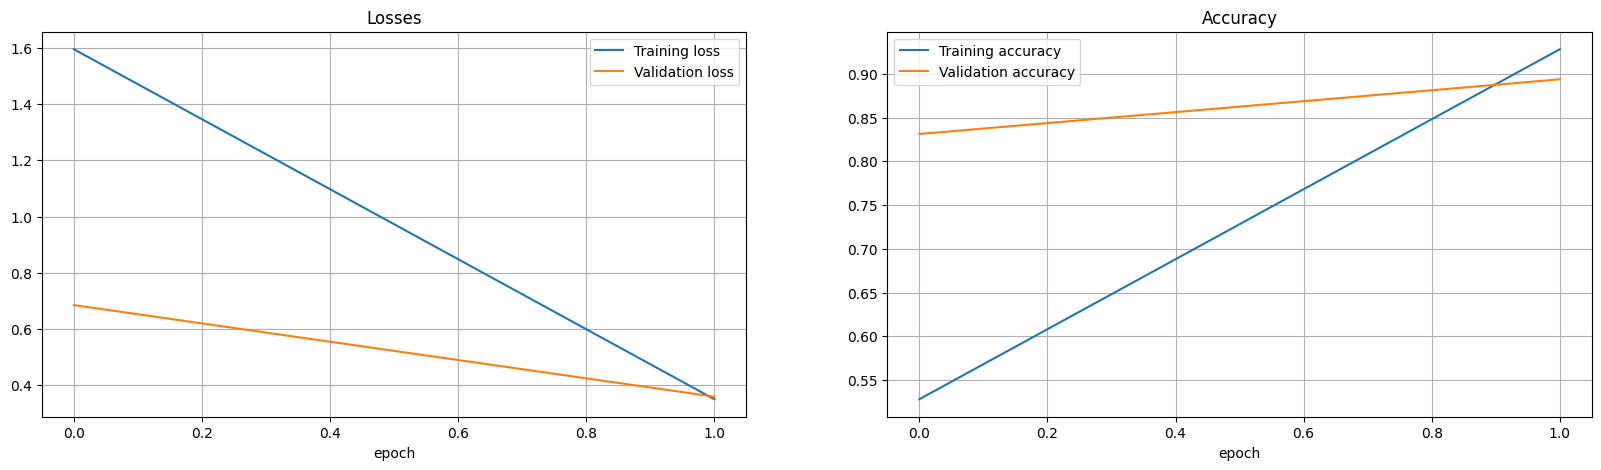

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


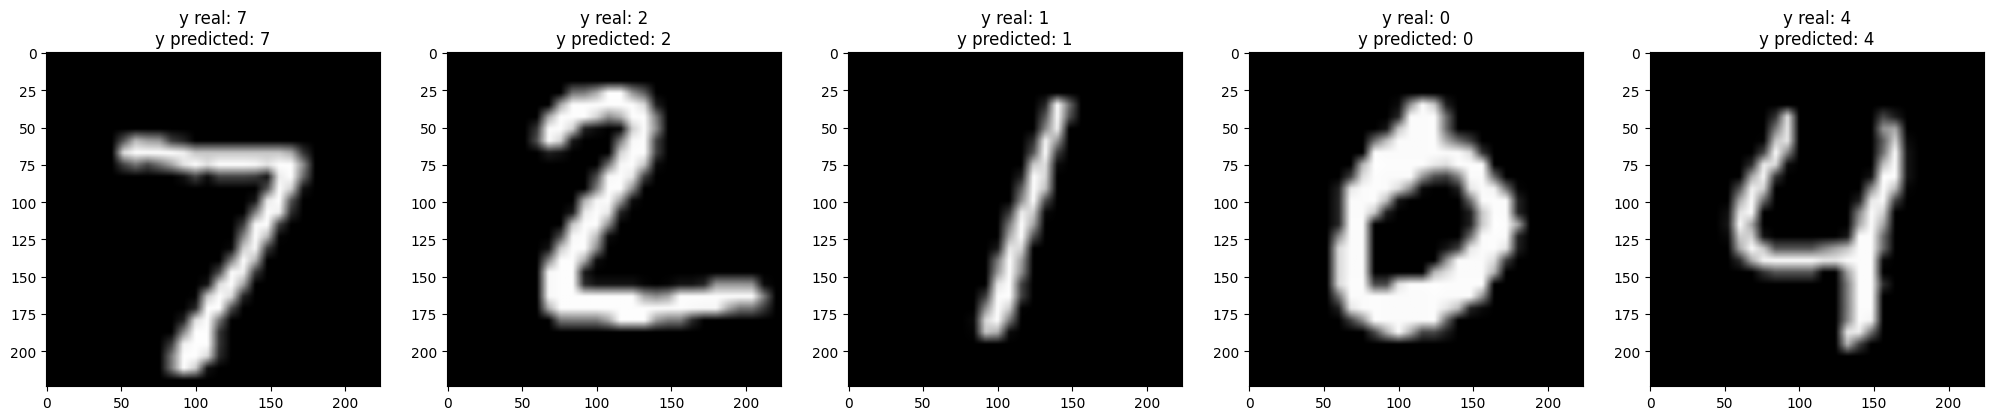

In [ ]:
plot_losses(history_vgg.history)

y_pred = model_vgg.predict(x_test[:5]).argmax(axis=-1)
show_examples(x_test[:5], test_labels[:5], y_pred)

# LLMs

**Fine-Tuning de un LLM**

El **fine-tuning** de un LLM implica ajustar un modelo de lenguaje grande que ha sido preentrenado en un conjunto de datos extenso y general, para adaptarlo a una tarea específica. Este proceso permite que el modelo aprenda características y patrones que son relevantes para el nuevo contexto o aplicación.

**¿Cómo Funciona?**

1. **Modelo Preentrenado**: Se comienza con un modelo de lenguaje grande que ya ha sido entrenado en grandes volúmenes de texto. Este modelo ha aprendido una representación general del lenguaje, capturando estructura, gramática y semántica.

2. **Adaptación a la Tarea**: Durante el fine-tuning, el modelo se entrena adicionalmente en un conjunto de datos más pequeño y específico para la tarea deseada (por ejemplo, clasificación de texto, respuesta a preguntas, etc.). Este conjunto de datos contiene ejemplos etiquetados que guiarán al modelo en su nuevo objetivo.

3. **Congelación de Capas**: También se lleva a cabo este concepto.

4. **Posibilidad de Añadir Capas**: También se puede llevar a cabo este concepto.


**Llama**
Llama 3.1 de Meta: 405 mil millones de parámetros en una IA open source sin precedentes.

**GPT4**
La mejor estimación actual proviene de AX Semantics , que sitúa el número de parámetros del GPT-4 en aproximadamente 100 billones.

**Gemini**
Cuenta con 175 mil millones de parámetros, lo que lo convierte en uno de los modelos de lenguaje más grandes del mundo.